# Maximum Likelihood Estimation

In this notebook, we will see what Maximum Likelihood Estimation is and how it can be used. 

**Contents**:
* **[Introduction](#introduction)**
* **[Mathematical Formulation](#Mathematical-Formulation)**
* **[Difference between Probability and Likelihood](#Difference-between-Probability-and-Likelihood)**
* **[Probability Distributions, Estimations and Codes](#Probability-Distributions,-Estimations-and-Codes)**
    * **[Bernoulli Distribution](#Bernoulli-Distribution)**
    * **[Binomial Distribution](#Binomial-Distribution)**
    * **[Poisson Distribution](#Poisson-Distribution)**
    * **[Exponential Distribution](#Exponential-Distribution)**
    * **[Normal Distribution](#Normal-Distribution)**
* **[Summary](#Summary)**
* **[References](#References)**

---

# Introduction

We often need to study populations for various purposes such as understanding its characteristics, for finding patterns and to devise better solutions using these information. However, for large populations, it is neither possible nor feasible to examine each individual in a population to understand these properties and characteristics. Hence, the statisticians make use of random sampling. The measurements are, therefore, made on much smaller samples for analysis and drawing conclusions about the population.

Analysing the data becomes a lot more easier if we are able to identify distribution of the population, using the sample. Any probability distribution is uniquely defined by some parameters. Therefore, if we somehow find/identify these parameters, we can easily study the population. This process of finding parameters for the population by analysing the samples from that population is called **estimation**.

We can say that whenever our estimation is good, on random sampling again, we are **likelier** to obtain a sample which would be very similar to our original sample. In other words, more the chances of getting a similar sample with our estimates of the parameters, more is the **likelihood** that our estimation is satisfactorily correct.

**Maximum likelihood estimation** is basically the process of estimating these parameters based on our sample, such that the likelihood of the population to be defined with those parameters is maximised.

---

# Mathematical Formulation

Now that we have a gist of the problem we are trying to solve here, let's define it more formally.

Suppose we have obtained a random sample from our population, given by $x_1, \ x_2, \ x_3, \ ..., \ x_n$. <br>
Now, using this sample, we want to assume some distribution for our population. Let that distribution be defined as $D(\theta)$, <br>
where $\theta = [\theta_1 \ \theta_2 \ \theta_3 \ ... \ \theta_k]^T$ is the vector defining the parameters for our assumed distribution $D$. 

Now, using our random sample, we want to determine the values of $\theta$ which will make our distribution $D$ most likely to define our population. In order to quantify how likely it is for our assumed distribution $D$ with its estimated parameters $\theta$ to define the population, we make use of **likelihood function**.

We define the likelihood function,
    $L : \{\theta, \ x_1, \ x_2, \ x_3, \ ..., \ x_n\} \longrightarrow \rm I\!R_0^+$ as follows: <br>

$$
    \begin{aligned}
        L(\theta \ | \ x_1, \ x_2, \ x_3, \ ..., \ x_n) 
            & = P(X_1 = x_1,X_2 = x_2,X_3 = x_3, \ ..., \ X_n = x_n) \\
        & = f(x_1 | \theta)\ .\ f(x_2 | \theta)\ .\ f(x_3 | \theta)\ .\ ...\ .\ f(x_n | \theta) \\
        & = \prod_{i = 1}^n f(x_i | \theta)
    \end{aligned}
$$

Here, $f$ is the probability mass/density function for our distribution $D$.

**Note**: Since the sample is selected randomly from a large population, we can assume that selection of a datum into the sample is **independent** from selection of any other datum. This assumption of independence allows us to multiply the probability mass/density functions for each datum to calculate the overall likelihood.

The **goal** of **Maximum Likelihood Estimation** is to find $\theta$ such that the likelihood function value gets maximised. For any likelihood function which is **concave**, or **negatively convexed**, we can find its maximum likelihood estimate by equating the first partial derivatives w.r.t. each parameter $\theta_j, \forall j \in \{1, 2, 3, \ ..., \ k\}$ to $0$. As we will see later, for commonly occuring probability distributions, the likelihood functions are indeed concave.

$$
    \begin{aligned}
        \therefore \ \theta 
            & = \text{arg} \ \max_{\theta \ \in \ \Theta} \  L(\theta \ | \ x_1, x_2, x_3, \ ..., \ x_n) \\
        \Longrightarrow \ \theta_j 
            & = \text{arg} \left( \frac{\partial L}{\partial \theta_j} = 0 \right) 
            \ \forall \ j \in \{1, \ 2, \ 3, \ ..., \ k\} \ | \ \text{L is concave}
    \end{aligned}
$$

Equating partial derivatives to $0$ would be difficult here because product of probability mass/density function for all the elements of the sample would require extended application of chain rule.
Hence, we make use of **logarithm function**. Logarithm function is monotonically strictly increasing function. Therefore, wherever $L$ will maximise, at the same parameter values, $\log(L)$ will also maximize. Therefore, instead of maximising the likelihood estimation, we maximise the **log likelihood estimation**.

$$
\begin{aligned}
    L(\theta \ | \ x_1, x_2, x_3, \ ..., \ x_n) & = \prod_{i = 1}^n f(x_i \ | \ \theta) \\
    \Longrightarrow \log\left(L(\theta \ | \ x_1, x_2, x_3, \ ..., \ x_n)\right) 
        & = \log\left(\prod_{i = 1}^n f(x_i \ | \ \theta)\right) \\
    & = \sum_{i = 1}^n \log\left(f(x_i \ | \ \theta)\right) \\
    \Longrightarrow \frac{\partial}{\partial \theta_j} 
        \log\left(L(\theta \ | \ x_1, x_2, x_3, \ ..., \ x_n)\right)
        & = \sum_{i = 1}^n \frac{\partial}{\partial \theta_j} \log\left(f(x_i \ | \ \theta)\right),
        \ \forall \ j \in \{1, 2, 3, \ ..., \ k\} \\
    & = \sum_{i = 1}^n \frac{1}{f(x_i \ | \ \theta)} \frac{\partial}{\partial \theta_j} f(x_i \ | \ \theta),
        \ \forall \ j \in \{1, 2, 3, \ ..., \ k\} \\
    \therefore \ \text{for concave likelihood functions}, \ \theta_j 
        & = \text{arg} \left(\sum_{i = 1}^n \frac{1}{f(x_i \ | \ \theta)} \frac{\partial}{\partial \theta_j}
        f(x_i \ | \ \theta) = 0\right), \ \forall \ j \in \{1, 2, 3, \ ..., \ k\} \\
\end{aligned}
$$

Now that we have seen the way to maximise the likelihood of estimation, let's do this for some probability distributions in the next section.

---

# Difference between Probability and Likelihood

In the beginning, one may think probability and likelihood to be the same thing with only thier names different. This is primarily because the mathematical formula for both of these entities are quite similar. So let's see how likelihood is different from probability. 

Roughly speaking, **probability** tells you the **possibility of observing specific results** or outcomes given a **particular distribution**. When we compute probability, we are already aware about the distribution parameters and hence the **distribution is fixed**. Therefore, with the help of probability, we are able to determine how probable it is to obtain the results in consideration for an event.

On the other hand, in likelihood, we deal with the reverse scenario. Likelihood tells you the possibility that something that you have observed is specifically distributed. This means, for the case of **likelihood** calculation, we already have our **results fixed**. In this case, the **the distribution parameters** play the role of **variables**. Therefore, using our results, we try to find how well some particular distribution fits on our results.

Mathematically, <br>
- Probability is described by a function $P : \{x_1, \ x_2, \ x_3, \ ..., \ x_n, \theta\} \longrightarrow [0, 1]$, computed as $P(x_1, \ x_2, \ x_3, \ ..., \ x_n \ | \ \theta)$
- Whereas, likelihood can be written as a function $L : \{x_1, \ x_2, \ x_3, \ ..., \ x_n, \theta\} \longrightarrow \rm I\!R_0^+$, computed as $L(\theta \ | \ x_1, \ x_2, \ x_3, \ ..., \ x_n)$

where, $x_1, \ x_2, \ x_3, \ ..., \ x_n$ are the results/observations, and $\theta$ is the vector of distribution parameters

Let's consider an example to understand this better. <br>
Suppose we are given an exponential distribution with its rate, i.e., $\lambda$ equal to $2$. This is how the probability density function for this distribution will look:

In [1]:
# make matplotlib plots plotted inline with the notebook
%matplotlib inline

# import packages
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss

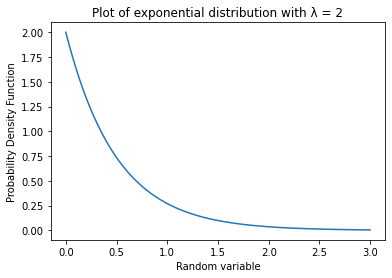

In [2]:
# find 10000 exponentially distributed values between 0 and 3
rate = 2 # lambda
x = np.linspace(0, 3, 10000) # 10000 uniformly spaced values between 0 and 3
y_pdf = ss.expon.pdf(x, scale=(1 / rate))
# scale is inverse of lambda, pdf function returns pdf values

# plot the values to visualise the distribution
plt.plot(x, y_pdf) # plot x againtst y values
plt.title('Plot of exponential distribution with λ = 2') # give title
plt.ylabel('Probability Density Function') # give y axis label
plt.xlabel('Random variable') # give x axis label
plt.show() # show the plot

Now suppose we want to know how likely is it that we'll find a waiting time, $x$, between two successive events as $x \geq 0.75 \wedge x \leq 1.5$ with this distribution. For that, we calculate the probability as $P(0.75 \leq x \leq 1.5 \ | \ \lambda = 2)$. This will be same as finding area under the curve.

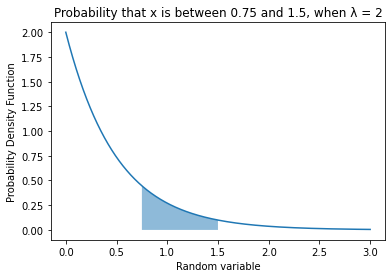

In [3]:
# define the bounds
lower_bound = 0.75
upper_bound = 1.5

# get indices in x with values within these bounds
mask = (x >= lower_bound) & (x <= upper_bound)
x_area = x[mask] # get values of x which are between the bounds
y_area = y_pdf[mask] # get corresponding values for the PDF function

plt.plot(x, y_pdf); # plot the PDF
plt.fill_between(x_area, y_area, 0, alpha=0.5) # plot area under the curve
plt.title('Probability that x is between 0.75 and 1.5, when λ = 2')
plt.ylabel('Probability Density Function')
plt.xlabel('Random variable')
plt.show()

Now, this area, when calculated, will be equal to equal to $\text{CDF}(1.5) - \text{CDF}(0.75)$, which is equal to 0.2492 (approx.).

In [4]:
# code to find the probability value:
ss.expon.cdf(upper_bound) - ss.expon.cdf(lower_bound)

0.2492363925925849

In this case, if you would see, we had the value of the distribution parameter, that is $\lambda$ already fixed to $2$. And using those fixed values, we calculated how probable it would be to find observations between $0.75$ and $1.5$.

Now, suppose we already have some results - let's say $x = 0.75$. Now using this, in case of likelihood, we want to evaluate how likely is it that this datum was obtained from a specific distribution. So let's try to first see the likelihood when $\lambda = 2$. For that, we calculate the likelihood as: $L(\lambda = 2 \ | \ x = 0.75) = \text{pdf}(x = 0.75 \ | \ \lambda = 2)$.

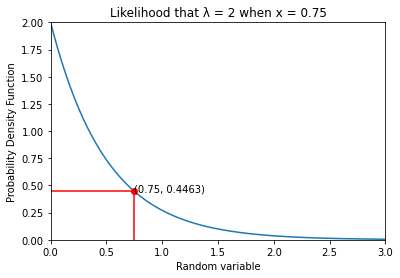

In [5]:
# define the observation and the rate values
observation = 0.75
rate = 2

# compute the likelihood value
likelihood = ss.expon.pdf(observation, scale=(1 / rate))

plt.plot(x, y_pdf) # plot the PDF
plt.plot([0, observation], [likelihood, likelihood], '-r') # plot the abscissa
# plot the oordinate
plt.plot([observation, observation], [0, likelihood], '-r')
plt.plot([observation], [likelihood], 'or') # plot the point
plt.annotate(f'({observation}, {round(likelihood, 4)})', xy=(observation, likelihood)) # annotate the point
plt.title('Likelihood that λ = 2 when x = 0.75')
plt.ylabel('Probability Density Function')
plt.xlabel('Random variable')
plt.xlim(0, 3) # define range on x axis
plt.ylim(0, 2) # define range on y axis
plt.show()

In this case, we can see that likelihood came out to be a single point on the PDF function curve. Hence, the likelihood that $\lambda = 2$ for exponential distribution when $x = 0.75$ is $0.4463$.

Similarly, for $\lambda = 0.5$, the likelihood will be: $0.3436$. <br> 
This means it is likelier that this observation has been drawn from an exponential distribution with rate $= 2$ rather than rate $= 0.5$.

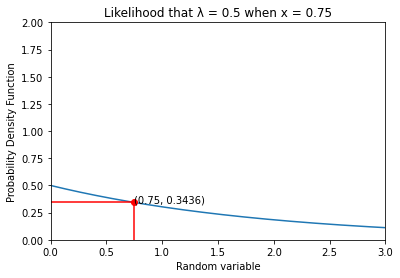

In [6]:
# define the observation and the rate values
observation = 0.75
rate = 0.5

# compute the likelihood value
likelihood = ss.expon.pdf(observation, scale=(1 / rate))

y_pdf = ss.expon.pdf(x, scale=(1 / rate)) # pdf values with scale changed
plt.plot(x, y_pdf); # plot the PDF
plt.plot([0, observation], [likelihood, likelihood], '-r'); # plot the abscissa
# plot the oordinate
plt.plot([observation, observation], [0, likelihood], '-r');
plt.plot([observation], [likelihood], 'or'); # plot the point
plt.annotate(f'({observation}, {round(likelihood, 4)})', xy=(observation, likelihood)); # annotate the point
plt.title('Likelihood that λ = 0.5 when x = 0.75')
plt.ylabel('Probability Density Function')
plt.xlabel('Random variable')
plt.xlim(0, 3)
plt.ylim(0, 2)
plt.show()

---

# Probability Distributions, Estimations and Codes

Now that we know what maximum likelihood estimation is and how we are supposed to do it, let's use it to estimate distributions for samples taken from some commonly occurring probability distributions.

## Bernoulli Distribution

Bernoulli Distribution is a **discrete** distribution which can be used to model a **single yes-no event**. An example of such an event is a coint toss. A coin can either land with heads up, or tails up. Since only two outcomes are possible in a Bernoulli trial, therefore, it has only **one parameter**, i.e., the **probability of obtaining one of the outcomes**. For the other outcome, because of the two outcomes being complementary, the probability for it to occurr is determined automatically.

Mathematically, <br>
A random variable $X$ is said to have a Bernoulli Distribution if, for $x \in X$:

$$
f(x) = \left\{
    \begin{matrix}
        p & \text{if } x = 1 \\
        1 - p & \text{if } x = 0 \\
        0 & \text{otherwise}
    \end{matrix}
\right.
$$

Here, $f$ is the probability mass function, $p$ is the probability for one of the two possible outcomes to happen, $x = 1$ implies that the first outcome has successfully occurred. Therefore, when $x = 0$, the first outcome has failed to occur which implies that the second outcome has occurred. Hence, the probability mass function can be condensed to the following representation:

$$
    f(x) = p^x(1 - p)^{1 - x}, \ x \in \{0, 1\}
$$

Now let's say we have a sample, $x_1, \ x_2, \ x_3, \ ..., \ x_n$ which we have obtained supposedly from $n$ independent and identical Bernoulli trials. So, we will now need to estimate what parameter $p$, for our assumed Bernoulli Distribution, will best describe our sample. For this, we proceed onto calculating the likelihood.

$$
\begin{aligned}
    L(p \ | \ x_1, x_2, x_3, \ ..., \ x_n) & = \prod_{i = 1}^n f(x_i \ | \ p) \\
    & = \prod_{i = 1}^n p^{x_i}(1 - p)^{1 - x_i}
\end{aligned}
$$

Therefore, the log likelihood function would be:

$$
\begin{aligned}
    \log L(p \ | \ x_1, x_2, x_3, \ ..., \ x_n) 
        & = \log\left(\prod_{i = 1}^n p^{x_i}(1 - p)^{1 - x_i}\right) \\
    & = \sum_{i = 1}^n \log\left(p^{x_i}(1 - p)^{1 - x_i}\right) \\
    & = \sum_{i = 1}^n \log\left(p^{x_i}\right) + \sum_{i = 1}^n \log\left((1 - p)^{1 - x_i}\right) \\
    & = \log(p) \sum_{i = 1}^n x_i + \log(1 - p) \sum_{i = 1}^n (1 - x_i) \\
    \text{Let's consider} \ \frac{1}{n}\sum_{i = 1}^n x_i 
        & = c, \ \text{where} \ c \ \text{is a constant for a given sample, } 
        0 \leq c \leq 1 \text{, independent of } p. \\
    \therefore \log L(p \ | \ x_1, x_2, x_3, \ ..., \ x_n) 
        & = n[c\log(p) + (1 - c)\log(1 - p)] \\
\end{aligned}
$$

Let's try to visualise this function. Since $n$ will only scale the function, we can ignore it for now. Also, the surface plot did not give a representation intuitive enough that the function is concave, so we have made these plots for $c \in \{0.1, 0.5, 0.9\}$ 

In [7]:
# include packages
import numpy as np
import matplotlib.pyplot as plt

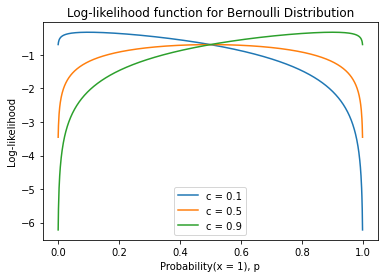

In [8]:
# make arrays for p and c 
p = np.linspace(0.001, 0.999, 1000)
c_s = np.linspace(0.1, 0.9, 3)

# define the figure
fig = plt.figure()
ax = plt.axes()

# plot the log-likelihood function for each value of c
for c in c_s:
    # compute log-likelihood function values
    log_likelihood = c * np.log(p) + (1 - c) * np.log(1 - p)
    ax.plot(p, log_likelihood, label=f'c = {c}') # plot log-likelihood function

plt.legend() # put legend on plot
plt.xlabel('Probability(x = 1), p')
plt.ylabel('Log-likelihood')
plt.title('Log-likelihood function for Bernoulli Distribution')
plt.show()

Here we observe that log-likelihood function is concave and we can, therefore, perform maximum likelihood estimation by equating partial derivates of this log-likelihood function w.r.t. $p$ to be $0$.

Partially differentiating log-likelihood function w.r.t. $p$, we get:

$$
\begin{aligned}
    \frac{\partial}{\partial p}\log L(p \ | \ x_1, x_2, x_3, \ ..., \ x_n)
        & = n\left[c \frac{\partial \log(p)}{\partial p} 
        + (1 - c) \frac{\partial \log(1 - p)}{\partial p}\right] \\
    & = n\left[c \frac{1}{p} - (1 - c) \frac{1}{1 - p}\right] \\
\end{aligned}
$$

Equating the partial derivative with 0, to find $p$ which gives maximum likelihood, we get:

$$
\begin{aligned}
    \frac{\partial}{\partial p}\log L(p \ | \ x_1, x_2, x_3, \ ..., \ x_n) & = 0 \\
    \Longrightarrow \frac{c}{p} & = \frac{1 - c}{1 - p} \\
    \Longrightarrow p & = c \\
    \therefore p & = \frac{1}{n} \sum_{i = 1}^n x_i = \bar{x}
\end{aligned}
$$

Hence, we find that for **MLE of Bernoulli Distribution**, the parameter $p$ should be kept as the **mean of the sample**. Now let's demonstrate this on an example.

In [9]:
# Let actual distribution parameter, p, be uniformly picked between 0 and 1
p = np.random.rand()

N = [1, 10, 100, 1000] # perform MLE with these many points in samples
sample = {} # to store the obtained samples

for n in N:
    # Simulate n identical and independent Bernoulli trials
    sample_n = []
    for i in range(n):
        # perform single Bernoulli trial and add the result to sample
        sample_n.append(np.random.binomial(n=1, p=p))
    sample[n] = sample_n # add sample to dictionary
print(sample[100]) # representation of a sample obtained

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]


In [10]:
# Now, let's try to perform maximum likelihood estimation using these samples.
# We saw that we estimate p to be equal to the sample mean
for n in N:
    p_hat = np.mean(sample[n])
    print(f'For n = %4d, we estimate the parameter p to be {p_hat}' % n)

For n =    1, we estimate the parameter p to be 0.0
For n =   10, we estimate the parameter p to be 0.3
For n =  100, we estimate the parameter p to be 0.17
For n = 1000, we estimate the parameter p to be 0.184


In [11]:
# Now, let's see the actual value of p ;)
print(f'The actual value of p is {p}')

The actual value of p is 0.19661891583995317


From this example, we see that with the help of maximum likelihood estimation, for large samples, we are able to estimate the values of the distribution parameter reasonably well.

---

## Binomial Distribution

Binomial Distribution is a discrete probability distribution which models the **number of successes** in an experiment in which $n$ **Bernoulli trials** were conducted successively and independently, such that probability for success in any of these trials is $p$. For example, number of heads obtained in $10$ coin tosses will be binomially distributed.

Formally,
For a random variable $X \sim \text{Bin}(n, p)$ if for $x \in X$, we have:

$$
f(x) = \left\{
    \begin{matrix} 
    \frac{n!}{(n - x)! x!} p^x (1 - p)^{n - x} 
            & \text{if } x \in \{z \ : \ z \in Z \ \wedge \ 0 \leq z \leq n\} \\
    0 & \text{otherwise }
    \end{matrix}
\right.
$$

where, $f$ is the probability mass function and $x_i$ is the number of successes in $i^{th}$ Bernoulli trial.

Now suppose we have a sample $x = [x_1 \ x_2 \ x_3 \ ... \ x_m]^T$, obtained after performing identical experiments $m$ times, and we assume it to come from a binomial distribution. Therefore, its likelihood function and log-likelihood function will be defined as:

$$
\begin{aligned}
    L(p \ | \ n, x) & = \prod_{i = 1}^m f(x_i \ | \ n, p) \\
    & = \prod_{i = 1}^m \frac{n!}{(n - x_i)! x_i!} p^{x_i} (1 - p)^{n - x_i} \\
    \therefore \log L(p \ | \ n, x) 
        & = \log\left(\prod_{i = 1}^m \frac{n!}{(n - x_i)! x_i!} p^{x_i} (1 - p)^{n - x_i}\right) \\
    & = \sum_{i = 1}^m \log\left(\frac{n!}{(n - x_i)! x_i!} p^{x_i} (1 - p)^{n - x_i}\right) \\
    & = \sum_{i = 1}^m \log\left(\frac{n!}{(n - x_i)! x_i!}\right) 
        + \sum_{i = 1}^m \log\left(p^{x_i} (1 - p)^{n - x_i}\right) \\
    & = \sum_{i = 1}^m \log\left(\frac{n!}{(n - x_i)! x_i!}\right) 
        + \log(p) \sum_{i = 1}^m x_i + \log(1 - p) \sum_{i = 1}^m (n - x_i) \\
    \text{Let's consider} \ \frac{1}{m}\sum_{i = 1}^m x_i 
        & = c, \ \text{where} \ c \ \text{is a constant for a given sample, }
        0 \leq c \leq n \text{, independent of } p. \\
    \therefore \log L(p \ | \ n, x) 
        & = \sum_{i = 1}^m \log\left(\frac{n!}{(n - x_i)! x_i!}\right)
            + m[c\log(p) + (n - c)\log(1 - p)] \\
\end{aligned}
$$

Since $\sum_{i = 1}^m \log\left(\frac{n!}{(n - x_i)! x_i!}\right)$ is constant for any given sample, and $m$ would only scale the rest of the terms, we can drop these two things while log-likelihood maximisation.
Let $\log L'(p \ | \ n, x) = c\log(p) + (n - c)\log(1 - p)$.

Therefore, we have:

$$
\begin{aligned}
    \frac{\partial}{\partial p} \log L'(p \ | \ n, x) 
        & = c \frac{\partial}{\partial p} \log(p) + (n - c) \frac{\partial}{\partial p} \log(1 - p) \\
    & = \frac{c}{p} - \frac{(n - c)}{1 - p} \\
    \Longrightarrow \frac{\partial^2}{\partial p^2} \log L'(p \ | \ n, x)
        & = - \frac{c}{p^2} - \frac{(n - c)}{{(1 - p)}^2} < 0 \ 
        \forall \ p \ \in \ (0, 1), \text{ implying concavity} \\
    \therefore \text{maxima of } L' \text{ will be when } 
        \frac{\partial}{\partial p} \log L'(p \ | \ n, x) & = 0 \\
    \Longrightarrow \frac{c}{p} & = \frac{(n - c)}{1 - p} \\
    \Longrightarrow p & = \frac{c}{n} \\
    \Longrightarrow p & = \frac{1}{mn} \sum_{i = 1}^m x_i
\end{aligned}
$$

Therefore, for **MLE of Binomial Distribution**, the parameter $p$ should be kept as the **mean of proportion of successes across all Binomial trials**. Let's see an example for the same.

In [12]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [13]:
# Let actual distribution parameter, p, be uniformly picked between 0 and 1
p = np.random.rand()

# Now, n has to be fixed, but it can be anything. So let n be 50
n = 50

# Now, suppose we conduct the Binomial trials m times, Let M = m_i for ith trial
M = [1, 10, 100, 1000] # perform MLE with these many points in samples

sample = {} # to store the obtained samples

for m in M:
    # Simulate m identical and independent Binomial trials
    sample_m = []
    for i in range(m):
        # perform n Bernoulli trials and add the result to sample
        sample_m.append(np.random.binomial(n=n, p=p))
    sample[m] = sample_m # add sample to dictionary
print(sample[100]) # a typical sample

[12, 13, 18, 17, 18, 17, 13, 16, 13, 15, 18, 14, 18, 19, 20, 18, 15, 14, 12, 11, 16, 18, 14, 15, 15, 21, 14, 14, 10, 16, 21, 13, 12, 13, 19, 14, 14, 18, 18, 14, 18, 10, 15, 21, 22, 15, 15, 16, 19, 11, 15, 11, 15, 23, 20, 18, 21, 10, 15, 16, 13, 16, 18, 13, 16, 18, 22, 14, 20, 10, 16, 11, 17, 22, 22, 13, 13, 15, 11, 13, 11, 13, 19, 14, 13, 18, 17, 13, 18, 17, 13, 20, 15, 13, 17, 21, 21, 12, 20, 19]


In [14]:
# Now, let's try to perform maximum likelihood estimation using these samples.
# We saw that we estimate p to be equal to the mean of total number of successes

for m in M:
    p_hat = np.mean(sample[m]) / n
    print(f'For m = %4d, we estimate the parameter p to be {p_hat}' % m)

For m =    1, we estimate the parameter p to be 0.38
For m =   10, we estimate the parameter p to be 0.284
For m =  100, we estimate the parameter p to be 0.3166
For m = 1000, we estimate the parameter p to be 0.31082


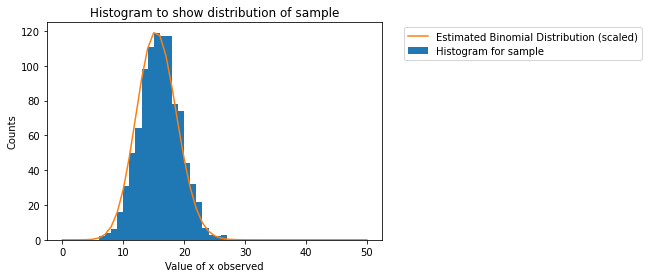

In [15]:
# Plot histogram for sample with 1000 Binomial experiments

# plot the histogram
plt.hist(sample[1000], bins=n, range=(0, n), label='Histogram for sample')

# Plot the distribution
# find nPx for all values of x
x = np.linspace(0, n, num=(n + 1))
n_s = n * np.ones(n + 1)
perms = scipy.special.comb(n_s, x) # calculate nPx

# calculate probabilities - p^x * (1 - p)^(n - x)
p_hat = np.mean(sample[1000]) / n
probs = (p_hat ** x) * ((1 - p_hat) ** (n - x))
y = np.multiply(perms, probs) # multiply perms with probs

# scale y in range of sample counts
y = y / np.max(y) * scipy.stats.mode(sample[1000]).count[0]

plt.plot(x, y, label='Estimated Binomial Distribution (scaled)') 
plt.title('Histogram to show distribution of sample')
plt.xlabel('Value of x observed')
plt.ylabel('Counts')
plt.legend(bbox_to_anchor=(1.05, 1), loc='best') # put legend outside the plot
plt.show()

Hence, we see that the binomial distribution with the value of its parameter that we calculated can estimate the sample well.

In [16]:
# Now, let's see the actual value of p
print(f'The actual value of p is {p}')

The actual value of p is 0.3106150407296725


Contrary to the example in Bernoulli distribution, we see that Binomial distribution parameter, $p$, can be estimated with decent accuracy even if we do not have a lot of points in the sample, given by $m$, provided our sample has been taken from results of large number of Bernoulli trials, $n$.

## Poisson Distribution

Poisson distribution is used to model the **number of occurrences** of any event which has a **constant mean rate** and whose occurrence is **independent of the last occurrence**, in a **fixed span** of quantifiable entity such as time, distance, area, volume etc. For example, the number of structural defects found per volume of an engineering material, or the number of calls received in an hour such that the average number of calls received in a day is usually the same.

The probability mass function for Poisson distribution is given as:
$$
f(k \ | \ \lambda) = 
\left\{
    \begin{matrix}
        \frac{\lambda^k e^{-\lambda}}{k!} & k \in Z^+_0 \\
        0 & \text{otherwise} \\
    \end{matrix}
\right.    
$$
where $k$ determines the number of occurrences of an event in a fixed span which has a parameter, expected number of occurrences in that span, given by $\lambda$.

Therefore, if we have a sample $x = [x_1 \ x_2 \ x_3 \ ... \ x_m]^T$ in which $x_i$ denotes the number of occurrences of the event in consideration in $i^{th}$ Poisson experiment, then its likelihood and log-likelihood estimation for the parameter $\lambda$ will be given as:

$$
\begin{aligned}
    L(\lambda \ | \ x) & = \prod_{i = 1}^m f(x_i \ | \ \lambda) \\
    & = \prod_{i = 1}^m \frac{\lambda^{x_i} e^{-\lambda}}{{x_i}!} \\
    \therefore \log L(\lambda \ | \ x) 
        & = \log \left(\prod_{i = 1}^m \frac{\lambda^{x_i} e^{-\lambda}}{{x_i}!}\right) \\
    & = \sum_{i = 1}^m \log \left(\frac{\lambda^{x_i} e^{-\lambda}}{{x_i}!}\right) \\
    & = \log \lambda \sum_{i = 1}^m x_i + \sum_{i = 1}^m (-\lambda) 
        - \sum_{i = 1}^m \log({x_i}!) \\
    \text{Let } \sum_{i = 1}^m x_i & = a \text{, where } a \text{ is a constant for a given sample.} \\
    \therefore \log L(\lambda \ | \ x) 
        & = a \log \lambda -\lambda m - \sum_{i = 1}^m \log({x_i}!) \\
\end{aligned}
$$
Now, for a given sample, $\sum_{i = 1}^m \log({x_i}!)$ will be a constant independent of $\lambda$, and therefore can be dropped from consideration for maximisation of likelihood. Let $\log L'(\lambda \ | \ x) = a \log \lambda -\lambda m$. Therefore, differentiating w.r.t. to $\lambda$, we get:
$$
\begin{aligned}
    \frac{\partial}{\partial \lambda} \log L'(\lambda \ | \ x)
        & = a \frac{\partial}{\partial \lambda} \log \lambda - m \frac{\partial}{\partial \lambda} \lambda \\
    & = \frac{a}{\lambda} - m \\
    \frac{\partial^2}{\partial \lambda^2} \log L'(\lambda \ | \ x)
        & = - \frac{a}{\lambda^2} < 0 \ \forall \ \lambda \ \in \ \rm I\!R^+ \text{, implying concavity} \\
    \therefore \text { for maximum log-likelihood estimation,} \\
    \frac{\partial}{\partial \lambda} \log L'(\lambda \ | \ x) & = 0 \\
    \Longrightarrow \frac{a}{\lambda} - m & = 0 \\
    \Longrightarrow \lambda & = \frac{a}{m} \\
    & = \frac{1}{m} \sum_{i = 1}^m x_i
\end{aligned}
$$

This means for **Poisson Distribution**, our parameter, $\lambda$, should be equal to the **sample arithmetic mean** for maximum-likelihood estimation. Next, let's see an example on a practical dataset.

We will be using the **[Prussian Horse Kick Data](http://www.randomservices.org/random/data/HorseKicks.html)**. This is a publicly available dataset containing the number of soldier deaths due to horse-kicks in Prussian Cavalry between 1875 and 1894, on an annual basis across 14 different cavalry corps. So let's get started.

In [17]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [18]:
# load the data from the text file stored in 'data' directory
horse_kick_data = pd.read_csv('../data/HorseKicks.txt', sep='\t', index_col='Year')
horse_kick_data.head()

,GC,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C14,C15
Year,,,,,,,,,,,,,,
1875,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1876,2,0,0,0,1,0,0,0,0,0,0,0,1,1
1877,2,0,0,0,0,0,1,1,0,0,1,0,2,0
1878,1,2,2,1,1,0,0,0,0,0,1,0,1,0
1879,0,0,0,1,1,2,2,0,1,0,0,2,1,0


In [19]:
# let us flatten our dataframe into an array, 
# such that each element of the array represents the number of deaths
# due to horse-kicks per corp per year
sample = horse_kick_data.to_numpy().flatten()
sample

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 1, 2,
       2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0,
       0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 0, 0, 0, 2, 1, 4, 3, 0, 1, 0, 0, 2,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1,
       4, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 3, 0, 0, 3, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 1,
       2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 3, 0, 1, 1, 2, 1, 0, 0, 3, 2,
       1, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2, 0, 2,
       1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 3, 3, 1, 0, 1, 3, 2, 0,
       1, 1, 3, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 1, 3,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [20]:
# Let us now estimate the distribution parameter, 𝜆
lambda_hat = np.mean(sample)
lambda_hat

0.7

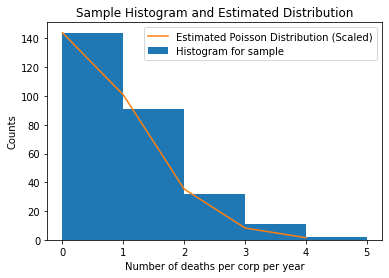

In [21]:
# Let us now plot the histogram as well as the estimated distribution

# plot the histogram
plt.hist(sample, bins=(sample.max() + 1), range=(0, sample.max() + 1),
         label='Histogram for sample')

# plot the distribution
# find the pmf values
x_s = list(range(sample.max() + 1))
y_s = (lambda_hat ** x_s) * np.exp(-lambda_hat) / scipy.special.factorial(x_s)

# scale the pmf values
y_s = y_s / y_s.max() * scipy.stats.mode(sample).count[0]
plt.plot(x_s, y_s, label='Estimated Poisson Distribution (Scaled)')

# customize plot
plt.title('Sample Histogram and Estimated Distribution')
plt.xlabel('Number of deaths per corp per year')
plt.ylabel('Counts')
plt.legend()
plt.show()

Note: Since the histogram counts the values into the bin with the lower limit $\leq$ the value, hence we must consider the points on the top-left vertices of the histogram bars to find the difference in the expected values and the actual values.

In [22]:
# Table to show Expected counts with the estimated distribution
# vs the actual counts observed from the sample

counts = pd.DataFrame() # define an empty dataframe
expected_counts = y_s
actual_counts = []

# find actual counts for all values in the sample
for x in x_s:
    actual_counts.append((sample == x).sum())

# assign column-wise values to the dataframe
counts['Number of deaths per corp per year'] = x_s
counts['Actual Counts'] = actual_counts
counts['Expected Counts'] = expected_counts

# change index column
counts = counts.set_index('Number of deaths per corp per year')

# see the resultant dataframe
counts

,Actual Counts,Expected Counts
Number of deaths per corp per year,,
0,144,144.0000
1,91,100.8000
2,32,35.2800
3,11,8.2320
4,2,1.4406


Therefore, we see that our estimated distribution fits well to the sample and can be further used to determine other relevant information.

## Exponential Distribution

**Exponential Distribution** models the **span of entities** such as time or distance **between consecutive occurrences** of an event following **Poisson Distribution**. Unlike the previously seen distributions, this is a **continuous distribution** since span can take continuous values. Like Poisson process, this distribution also has a property of **memorylessness**, which means that the previous occurrences and the time between them do not affect the occurrences happening later.

Probability density function for Exponential Distribution is given by:
$$
f(x \ | \ \lambda) = \left\{
    \begin{matrix}
        \lambda e^{-\lambda x} & x \geq 0 \\
        0 & \text{otherwise} \\
    \end{matrix}
\right.
$$
where $\lambda$ is the mean occurrence rate of the event under consideration, and $x$ determines the span of entity observed between consecutive occurrences.

For a sample $x = [x_1 \ x_2 \ x_3 \ ... \ x_m]^T$, such that $x_i$ is the span of entitiy between the occurrence of $i^{th}$ and $(i + 1)^{th}$ events, the likelihood and log-likelihood functions and the condition for maximum likelihood estimation would be as follows:
$$
\begin{aligned}
    L(\lambda \ | \ x) & = \prod_{i = 1}^m f(x_i \ | \ \lambda) \\
    & = \prod_{i = 1}^m \lambda e^{-\lambda x_i} \\
    \therefore \log L(\lambda \ | \ x) 
        & = \log \left(\prod_{i = 1}^m \lambda e^{-\lambda x_i}\right) \\
    & = \sum_{i = 1}^m \log \left(\lambda e^{-\lambda x_i}\right) \\
    & = m \log \lambda - \lambda \sum_{i = 1}^m x_i \\
    \text{Let } \sum_{i = 1}^m x_i & = a \text{, where } a \text{ is a constant for a given sample.} \\
    \therefore \log L(\lambda \ | \ x) 
        & = m \log \lambda -\lambda a \\
    \therefore \frac{\partial}{\partial \lambda} \log L(\lambda \ | \ x)
        & = m \frac{\partial}{\partial \lambda} \log \lambda - a \frac{\partial}{\partial \lambda} \lambda \\
    & = \frac{m}{\lambda} - a \\
    \Longrightarrow \frac{\partial^2}{\partial \lambda^2} \log L(\lambda \ | \ x)
        & = - \frac{m}{\lambda^2} < 0 \ \forall \ \lambda \ \in \ \rm I\!R^+ \text{, implying concavity} \\
    \Longrightarrow \text{For maximum log-likelihood estimation,} \\
    \frac{\partial}{\partial \lambda} \log L(\lambda \ | \ x) & = 0 \\
    \Longrightarrow \frac{m}{\lambda} - a & = 0 \\
    \Longrightarrow \lambda & = \frac{m}{a} \\
    & = \frac{m}{\sum_{i = 1}^m x_i}
\end{aligned}
$$

Therefore, we see that for maximum likelihood estimation of **Exponential Distribution**, the parameter $\lambda$ should be equal to the **reciprocal of sample arithmetic mean**. Let's see an example. In this example, we shall refer a dataset from the reliability package (needed to be installed additionally), which contains the information of distances after which failures occurred in vehicles.

In [23]:
# pip install reliability 
# run the above stated command first to install reliability package

# import packages
import reliability
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# import the dataset and see its help
mileage = reliability.Datasets.mileage
print(help(mileage))

Help on class mileage in module reliability.Datasets:

class mileage(builtins.object)
 |  This dataset is simple to fit. It contains 100 values with no right censoring. The data appears to be from a Normal Distribution.
 |  Sourced from Example 2.31 (page 63) of Reliability Engineering and Risk analysis 3rd Edition by M. Modarres, M. Kaminskiy, and V.V. Krivtsov
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)

None


In [25]:
# get list of distances at which failures occurred
failures = mileage().failures

# sort the list so that distance between consecutive failures can be calculated
failures.sort()

# see the list
print(failures)

[8734, 9979, 10014, 10539, 11538, 14318, 14525, 15261, 16651, 16735, 16768, 16946, 17438, 17861, 18318, 19938, 20269, 20588, 21075, 21248, 21293, 21757, 22159, 22374, 22418, 22456, 22532, 24571, 24993, 25056, 25210, 25746, 25754, 26208, 26252, 26704, 26713, 26830, 27037, 27300, 27322, 27812, 27836, 27837, 28109, 28127, 28172, 28185, 28219, 28433, 28688, 28968, 29015, 29180, 29760, 29807, 30368, 30935, 31084, 31388, 31565, 32176, 32231, 32628, 32677, 32797, 32914, 33532, 33703, 34107, 35138, 35390, 35589, 36258, 36531, 36837, 37603, 37623, 37752, 38071, 39485, 40902, 41064, 41267, 41821, 42911, 43154, 43665, 43939, 44264, 44404, 45283, 45554, 47119, 47590, 49432, 49436, 52448, 55269, 55627]


In [26]:
# let's populate the list of time taken between consecutive failures
time_between_failures = []
for i in range(len(failures) - 1):
    time_between_failures.append(failures[i + 1] - failures[i])
    
# let's see the final data obtained
print(time_between_failures)

[1245, 35, 525, 999, 2780, 207, 736, 1390, 84, 33, 178, 492, 423, 457, 1620, 331, 319, 487, 173, 45, 464, 402, 215, 44, 38, 76, 2039, 422, 63, 154, 536, 8, 454, 44, 452, 9, 117, 207, 263, 22, 490, 24, 1, 272, 18, 45, 13, 34, 214, 255, 280, 47, 165, 580, 47, 561, 567, 149, 304, 177, 611, 55, 397, 49, 120, 117, 618, 171, 404, 1031, 252, 199, 669, 273, 306, 766, 20, 129, 319, 1414, 1417, 162, 203, 554, 1090, 243, 511, 274, 325, 140, 879, 271, 1565, 471, 1842, 4, 3012, 2821, 358]


Let's now try to fit exponential distribution on it.

In [27]:
# estimate lambda
lambda_hat = 1 / np.mean(time_between_failures)
lambda_hat # these many average failures per unit distance covered

0.00211118930330753

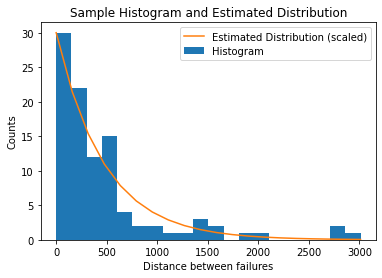

In [28]:
# Let's plot the time between failures and the estimated distribution

# plot the histogram and store bin counts
bin_counts = plt.hist(time_between_failures, bins=20, 
                      range=(0, np.max(time_between_failures)),
                      label='Histogram')[0]

# plot the estimated distribution
# find pdf values
x_s = np.linspace(0, np.max(time_between_failures), 20)
y_s = lambda_hat * np.exp(-lambda_hat * x_s)

# scale pdf values
y_s = y_s / np.max(y_s) * np.max(bin_counts)

# plot x_s vs y_s
plt.plot(x_s, y_s, label='Estimated Distribution (scaled)')

# customize the plot
plt.title('Sample Histogram and Estimated Distribution')
plt.xlabel('Distance between failures')
plt.ylabel('Counts')
plt.legend()
plt.show()

We see that our estimated exponential distribution fits the data reasonably well.

## Normal Distribution

# Summary

# References

The following sources were referred while making this notebook:
- [Maximum Likelihood Estimation, STAT 415 - Introduction to Mathematical Statistics, PennState](https://online.stat.psu.edu/stat415/lesson/1/1.2)
- [Maximum-likelihood (ML) Estimation, STAT 504 - Analysis of Discrete Data, PennState](https://online.stat.psu.edu/stat504/node/28/)
- [Parameter Estimation, Chris Piech and Mehran Sahami, Stanford University](https://web.stanford.edu/class/cs109/reader/11%20Parameter%20Estimation.pdf)
- [Maximum Likelihood Estimation, Wikipedia](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)
- [Probability Concepts Explained: Maximum Likelihood Estimation, towards data science](https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1)
- [StatQuest: Maximum Likelihood, clearly explained!!!, StatQuest with Josh Starmer](https://youtu.be/XepXtl9YKwc)
- [StatQuest: Probability vs Likelihood, StatQuest with Josh Starmer](https://youtu.be/pYxNSUDSFH4)
- [Maximum Likelihood for the Binomial Distribution, Clearly Explained!!!, StatQuest with Josh Starmer](https://youtu.be/4KKV9yZCoM4)
- [Maximum Likelihood for the Exponential Distribution, Clearly Explained! V2.0, StatQuest with Josh Starmer](https://youtu.be/p3T-_LMrvBc)
- [Maximum Likelihood For the Normal Distribution, step-by-step!, StatQuest with Josh Starmer](https://youtu.be/Dn6b9fCIUpM)